In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv("EP22_prep/touches.csv")

In [8]:
touches = raw_df.copy()

In [4]:
touches.head()

,start_m,start_s,end_m,end_s,half,from,to,type,subtype,nearest_pressure,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,NaN,set,kickoff,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,ronaldo,pass,b,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,matic,pass,backwards,odegaard,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,dalot,pass,backwards,nketiah,65.6,33.4,72.2,55.2,63.4,36.4
4,0,5,NaN,NaN,1,gabriel,NaN,won,intercepted.longball,NaN,29.7,43.0,NaN,NaN,NaN,NaN


In [9]:
ars_set = {"elneny", "white", "xhaka", "cedric", "odegaard", "gabriel", "ramsdale", "tavares", "saka", "nketiah", "smith_rowe", "martinelli", "holding", "tomiyasu"}

In [12]:
if "gabriel" in ars_set == True:
    print("bob")

In [10]:
man_set = {"lindelof", "varane", "dalot", "telles", "fernandes", "sancho", "mctominay", "matic", "ronaldo", "de_gea", "elanga", "mata", "rashford", "lingard"}

In [5]:
touches["from"].value_counts(dropna=False)

elneny        108
white          95
xhaka          93
cedric         90
odegaard       85
lindelof       83
gabriel        82
varane         80
dalot          80
telles         80
ramsdale       63
tavares        61
fernandes      54
saka           54
sancho         53
mctominay      51
matic          46
ronaldo        37
nketiah        37
de_gea         35
smith_rowe     34
elanga         26
mata           19
rashford       11
lingard        10
martinelli      9
holding         7
tomiyasu        6
Name: from, dtype: int64

In [11]:
def team(player):
    if player in ars_set:
        return "arsenal"
    elif player in man_set:
        return "man_u"
    else:
        return "Error"

In [17]:
team("elanga")

'man_u'

In [12]:
touches["from_team"] = touches["from"].apply(lambda x: team(x))

In [9]:
touches.head()

,start_m,start_s,end_m,end_s,half,from,to,type,subtype,nearest_pressure,start_x,start_y,end_x,end_y,press_x,press_y,from_team
0,0,0,0.0,0.0,1,fernandes,NaN,set,kickoff,NaN,52.5,34.0,NaN,NaN,NaN,NaN,man_u
1,0,0,0.0,1.0,1,fernandes,ronaldo,pass,b,NaN,52.5,34.0,55.8,31.3,NaN,NaN,man_u
2,0,1,0.0,2.0,1,ronaldo,matic,pass,backwards,odegaard,55.8,31.3,65.6,33.4,55.7,30.4,man_u
3,0,2,0.0,3.0,1,matic,dalot,pass,backwards,nketiah,65.6,33.4,72.2,55.2,63.4,36.4,man_u
4,0,5,NaN,NaN,1,gabriel,NaN,won,intercepted.longball,NaN,29.7,43.0,NaN,NaN,NaN,NaN,arsenal


In [13]:
# col_to_move = df.pop("col")
# df.insert(2, "col", col_to_move)  
touches.insert(6, "from_team", touches.pop("from_team"))

In [11]:
touches[["from", "from_team"]].groupby(["from", "from_team"]).size()

from        from_team
cedric      arsenal       90
dalot       man_u         80
de_gea      man_u         35
elanga      man_u         26
elneny      arsenal      108
fernandes   man_u         54
gabriel     arsenal       82
holding     arsenal        7
lindelof    man_u         83
lingard     man_u         10
martinelli  arsenal        9
mata        man_u         19
matic       man_u         46
mctominay   man_u         51
nketiah     arsenal       37
odegaard    arsenal       85
ramsdale    arsenal       63
rashford    man_u         11
ronaldo     man_u         37
saka        arsenal       54
sancho      man_u         53
smith_rowe  arsenal       34
tavares     arsenal       61
telles      man_u         80
tomiyasu    arsenal        6
varane      man_u         80
white       arsenal       95
xhaka       arsenal       93
dtype: int64

In [14]:
def team_na(player):
    import numpy as np
    if player != np.nan:
        if player in ars_set:
            return "arsenal"
        elif player in man_set:
            return "man_u"
    else:
        pass

In [15]:
touches["nearest_pressure_team"] = touches["nearest_pressure"].apply(lambda x: team_na(x))

In [16]:
touches.insert(11, "nearest_pressure_team", touches.pop("nearest_pressure_team"))

In [17]:
passes = touches[touches["type"] == "pass"].copy()

In [18]:
passes.head()

,start_m,start_s,end_m,end_s,half,from,from_team,to,type,subtype,nearest_pressure,nearest_pressure_team,start_x,start_y,end_x,end_y,press_x,press_y
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,pass,b,NaN,None,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,pass,backwards,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,pass,backwards,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
6,0,8,0.0,10.0,1,elneny,arsenal,cedric,pass,backwards,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6
9,0,30,0.0,32.0,1,white,arsenal,gabriel,pass,backwards,NaN,None,56.1,10.2,47.6,35.7,NaN,NaN


In [19]:
passes.nearest_pressure.value_counts(dropna=False)

NaN           265
fernandes      73
mctominay      48
sancho         46
odegaard       44
nketiah        36
elanga         25
saka           25
martinelli     22
telles         20
smith_rowe     18
lingard        18
matic          17
xhaka          17
tavares        14
dalot          12
rashford       12
white          12
ronaldo        12
elneny         12
varane         10
cedric          7
mata            5
gabriel         3
lindelof        2
holding         1
tomiyasu        1
Name: nearest_pressure, dtype: int64

In [17]:
passes.to_csv("passes_team_na.csv")

In [60]:
passes = passes.iloc[:, [4,5,6,7,8,10,11,12,13,14,15,16,17]]

In [56]:
list(enumerate(passes))

[(0, 'half'),
 (1, 'from'),
 (2, 'from_team'),
 (3, 'to'),
 (4, 'type'),
 (5, 'nearest_pressure'),
 (6, 'nearest_pressure_team'),
 (7, 'start_x'),
 (8, 'start_y'),
 (9, 'end_x'),
 (10, 'end_y'),
 (11, 'press_x'),
 (12, 'press_y')]

In [61]:
passes.head()

,half,from,from_team,to,type,nearest_pressure,nearest_pressure_team,start_x,start_y,end_x,end_y,press_x,press_y
1,1,fernandes,man_u,ronaldo,pass,NaN,None,52.5,34.0,55.8,31.3,NaN,NaN
2,1,ronaldo,man_u,matic,pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,1,matic,man_u,dalot,pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
6,1,elneny,arsenal,cedric,pass,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6
9,1,white,arsenal,gabriel,pass,NaN,None,56.1,10.2,47.6,35.7,NaN,NaN


In [19]:
p1 = passes[passes["half"]==1].copy()

In [20]:
p2 = passes[passes["half"]==2].copy()

In [21]:
p2["start_x"]  = 105-p2["start_x"] 

In [22]:
p2["start_y"] = 68-p2["start_y"]

In [23]:
p2["end_x"] = 105-p2["end_x"]

In [24]:
p2["end_y"] = 68-p2["end_y"]

In [25]:
p2["press_x"] = 105-p2["press_x"]

In [26]:
p2["press_y"] = 68-p2["press_y"]

In [27]:
p2.tail()

,start_m,start_s,end_m,end_s,half,from,from_team,to,type,subtype,nearest_pressure,nearest_pressure_team,start_x,start_y,end_x,end_y,press_x,press_y
1481,93,43,93.0,44.0,2,lindelof,man_u,varane,pass,s,nketiah,arsenal,82.3,49.5,74.7,19.7,NaN,NaN
1483,93,46,93.0,47.0,2,varane,man_u,telles,pass,f,NaN,None,70.5,16.3,58.3,4.1,NaN,NaN
1484,93,47,93.0,50.0,2,telles,man_u,mctominay,pass,s,NaN,None,58.3,4.1,59.2,14.1,NaN,NaN
1485,93,50,93.0,52.0,2,mctominay,man_u,lindelof,pass,s,elneny,arsenal,59.2,14.1,63.5,39.4,NaN,NaN
1487,93,54,93.0,55.0,2,lindelof,man_u,sancho,pass,s,sancho,man_u,60.7,41.9,50.5,57.8,NaN,NaN


In [28]:
passes.tail()

,start_m,start_s,end_m,end_s,half,from,from_team,to,type,subtype,nearest_pressure,nearest_pressure_team,start_x,start_y,end_x,end_y,press_x,press_y
1481,93,43,93.0,44.0,2,lindelof,man_u,varane,pass,s,nketiah,arsenal,22.7,18.5,30.3,48.3,NaN,NaN
1483,93,46,93.0,47.0,2,varane,man_u,telles,pass,f,NaN,None,34.5,51.7,46.7,63.9,NaN,NaN
1484,93,47,93.0,50.0,2,telles,man_u,mctominay,pass,s,NaN,None,46.7,63.9,45.8,53.9,NaN,NaN
1485,93,50,93.0,52.0,2,mctominay,man_u,lindelof,pass,s,elneny,arsenal,45.8,53.9,41.5,28.6,NaN,NaN
1487,93,54,93.0,55.0,2,lindelof,man_u,sancho,pass,s,sancho,man_u,44.3,26.1,54.5,10.2,NaN,NaN


In [29]:
###
allp = pd.concat([p1,p2], axis=0)

In [39]:
def touch_coords_team(df, team, half):
    df = df[df["half"]==half]
    x1_list = df[df["from_team"] == team]["start_x"].to_list()
    y1_list = df[df["from_team"] == team]["start_y"].to_list()
    x2_list = df[df["from_team"] == team]["end_x"].to_list()
    y2_list = df[df["from_team"] == team]["end_y"].to_list()
    return {"all_x" : x1_list + x2_list, "all_y": y1_list + y2_list}

In [40]:
def touch_coords_team_full(df, team):
    x1_list = df[df["from_team"] == team]["start_x"].to_list()
    y1_list = df[df["from_team"] == team]["start_y"].to_list()
    x2_list = df[df["from_team"] == team]["end_x"].to_list()
    y2_list = df[df["from_team"] == team]["end_y"].to_list()
    return {"all_x" : x1_list + x2_list, "all_y": y1_list + y2_list}

In [80]:
touch_coords_team(passes, "arsenal", 1)["all_x"][:10]

[37.6, 56.1, 48.7, 67.9, 57.4, 37.8, 64.8, 47.6, 46.5, 42.5]

In [41]:
def press_coords_team(df, team, half):
    df = df[df["half"]==half]
    x1_list = df[df["nearest_pressure_team"]==team]["press_x"].to_list()
    y1_list = df[df["nearest_pressure_team"]==team]["press_y"].to_list()
    return {"all_x": x1_list, "all_y": y1_list}

In [81]:
from mplsoccer import Pitch

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

In [32]:
import matplotlib.image as mpimg

In [34]:
pitch = mpimg.imread("Emirates.png")

In [35]:
ars_passes = passes[passes["from_team"] == "arsenal"].copy()

In [36]:
ars_passes.head()

,start_m,start_s,end_m,end_s,half,from,from_team,to,type,subtype,nearest_pressure,nearest_pressure_team,start_x,start_y,end_x,end_y,press_x,press_y
6,0,8,0.0,10.0,1,elneny,arsenal,cedric,pass,backwards,fernandes,man_u,37.6,40.0,28.8,18.3,37.4,42.6
9,0,30,0.0,32.0,1,white,arsenal,gabriel,pass,backwards,NaN,None,56.1,10.2,47.6,35.7,NaN,NaN
11,0,33,0.0,35.0,1,gabriel,arsenal,tavares,pass,forward,NaN,None,48.7,37.7,67.9,66.2,NaN,NaN
12,0,37,0.0,38.0,1,tavares,arsenal,xhaka,pass,backwards,elanga,man_u,67.9,66.2,62.5,62.1,67.9,66.0
14,0,40,0.0,41.0,1,xhaka,arsenal,gabriel,pass,backwards,NaN,None,57.4,62.5,37.8,62.3,NaN,NaN


In [51]:
pd.crosstab(ars_passes["from"], ars_passes["to"], normalize=True).round(3)*100

to,cedric,elneny,gabriel,holding,martinelli,nketiah,odegaard,ramsdale,saka,smith_rowe,tavares,tomiyasu,white,xhaka
from,,,,,,,,,,,,,,
cedric,0.0,2.0,0.0,0.2,0.0,0.0,2.9,0.2,1.4,0.0,0.0,0.0,3.2,1.4
elneny,2.9,0.0,1.6,0.0,0.0,0.7,2.7,0.2,0.7,0.7,0.5,0.7,0.5,3.4
gabriel,0.5,0.9,0.0,0.2,0.0,0.2,0.2,1.6,0.2,0.2,1.8,0.0,1.1,1.8
holding,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
martinelli,0.0,0.2,0.0,0.0,0.0,0.2,0.2,0.0,0.2,0.0,0.2,0.0,0.0,0.2
nketiah,0.5,0.5,0.0,0.0,0.2,0.0,0.9,0.0,0.9,0.2,0.2,0.0,0.0,0.9
odegaard,1.8,2.3,0.7,0.0,0.7,0.9,0.0,0.2,2.0,0.2,0.5,0.2,0.5,0.9
ramsdale,0.0,0.9,0.7,0.0,0.0,0.0,0.2,0.0,0.0,0.2,0.0,0.0,3.4,0.2
saka,2.5,1.1,0.0,0.0,0.0,0.7,0.9,0.0,0.0,0.2,0.0,0.0,0.2,0.2


In [55]:
ars_passes[["from", "to"]].groupby("from").size()

from
cedric        50
elneny        64
gabriel       39
holding        2
martinelli     6
nketiah       19
odegaard      48
ramsdale      26
saka          26
smith_rowe    19
tavares       23
tomiyasu       3
white         55
xhaka         63
dtype: int64

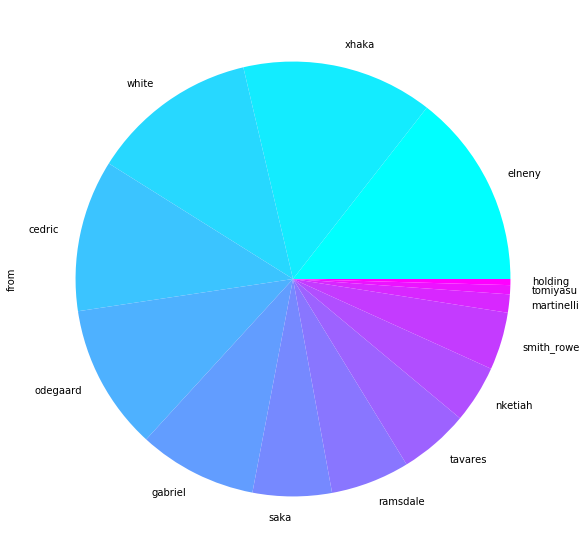

In [65]:
ars_passes["from"].value_counts().plot(kind="pie", figsize=(10,10), cmap="cool")

In [ ]:
ars_passes.to.plot(

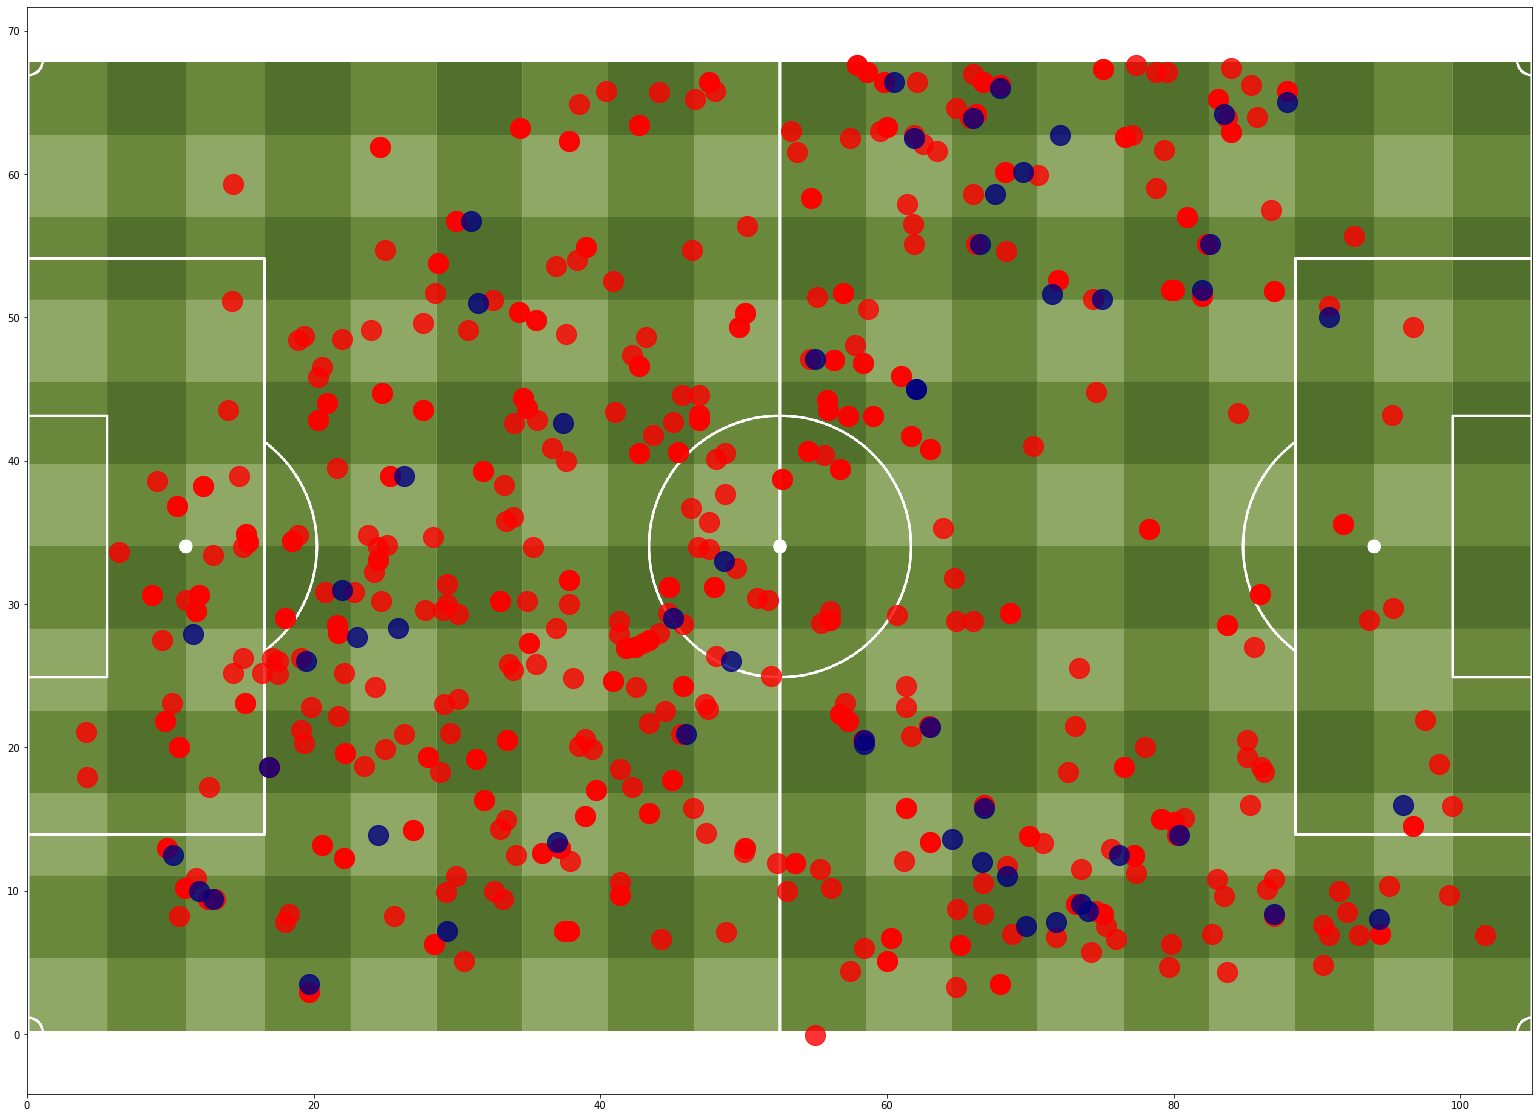

In [97]:
# Defence, Mid, Attack

fig, ax = plt.subplots(figsize=(30,20))
ax.imshow(pitch, extent=[0,105,0,68]) # [0,105,0,68]
plt.scatter( x=touch_coords_team(passes, "arsenal", 1)["all_x"], y=touch_coords_team(passes, "arsenal", 1)["all_y"],
            s=400, c="red", alpha=0.8)
plt.scatter( x=press_coords_team(passes, "man_u", 1)["all_x"], y=press_coords_team(passes, "man_u", 1)["all_y"],
            s=400, c="navy", alpha=0.8)
plt.show()

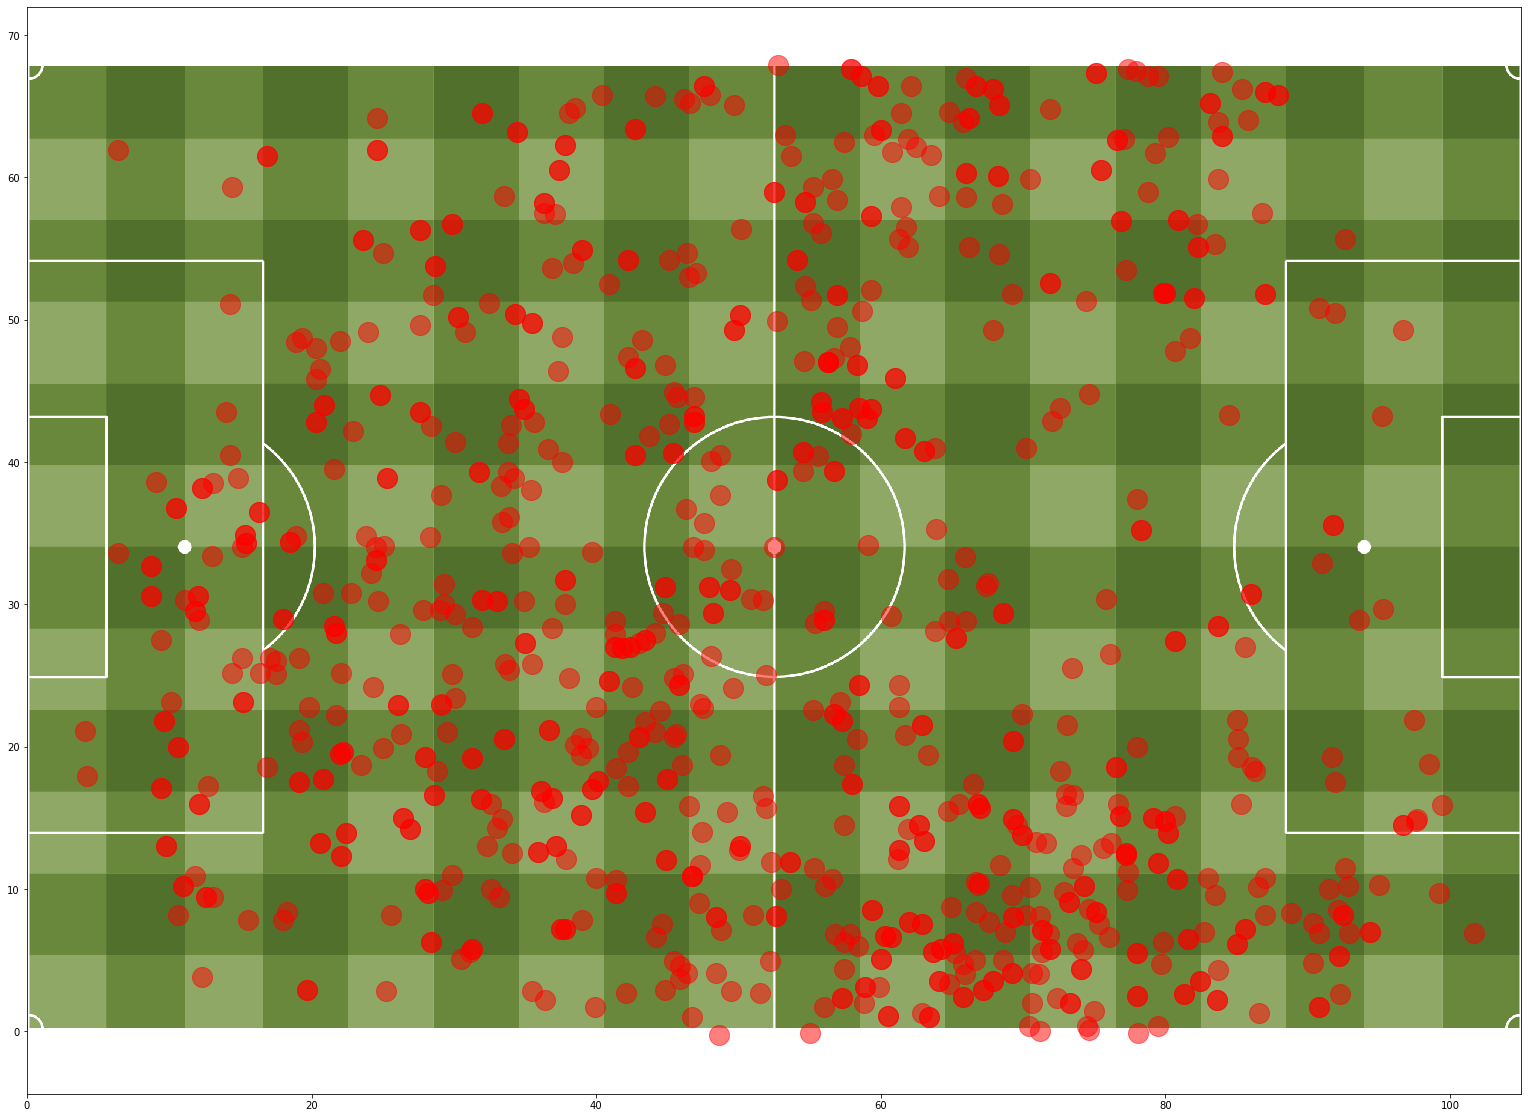

In [145]:


fig, ax = plt.subplots(figsize=(30,20))
ax.imshow(pitch, extent=[0,105,0,68]) # [0,105,0,68]
plt.scatter( x=touch_coords_team_full(allp, "arsenal")["all_x"], y=touch_coords_team_full(allp, "arsenal")["all_y"],
            s=400, c="red", alpha=0.5)
# plt.scatter( x=press_coords_team(passes, "man_u", 1)["all_x"], y=press_coords_team(passes, "man_u", 1)["all_y"],
#             s=400, c="navy", alpha=0.8)
plt.show()

In [37]:
import seaborn as sns

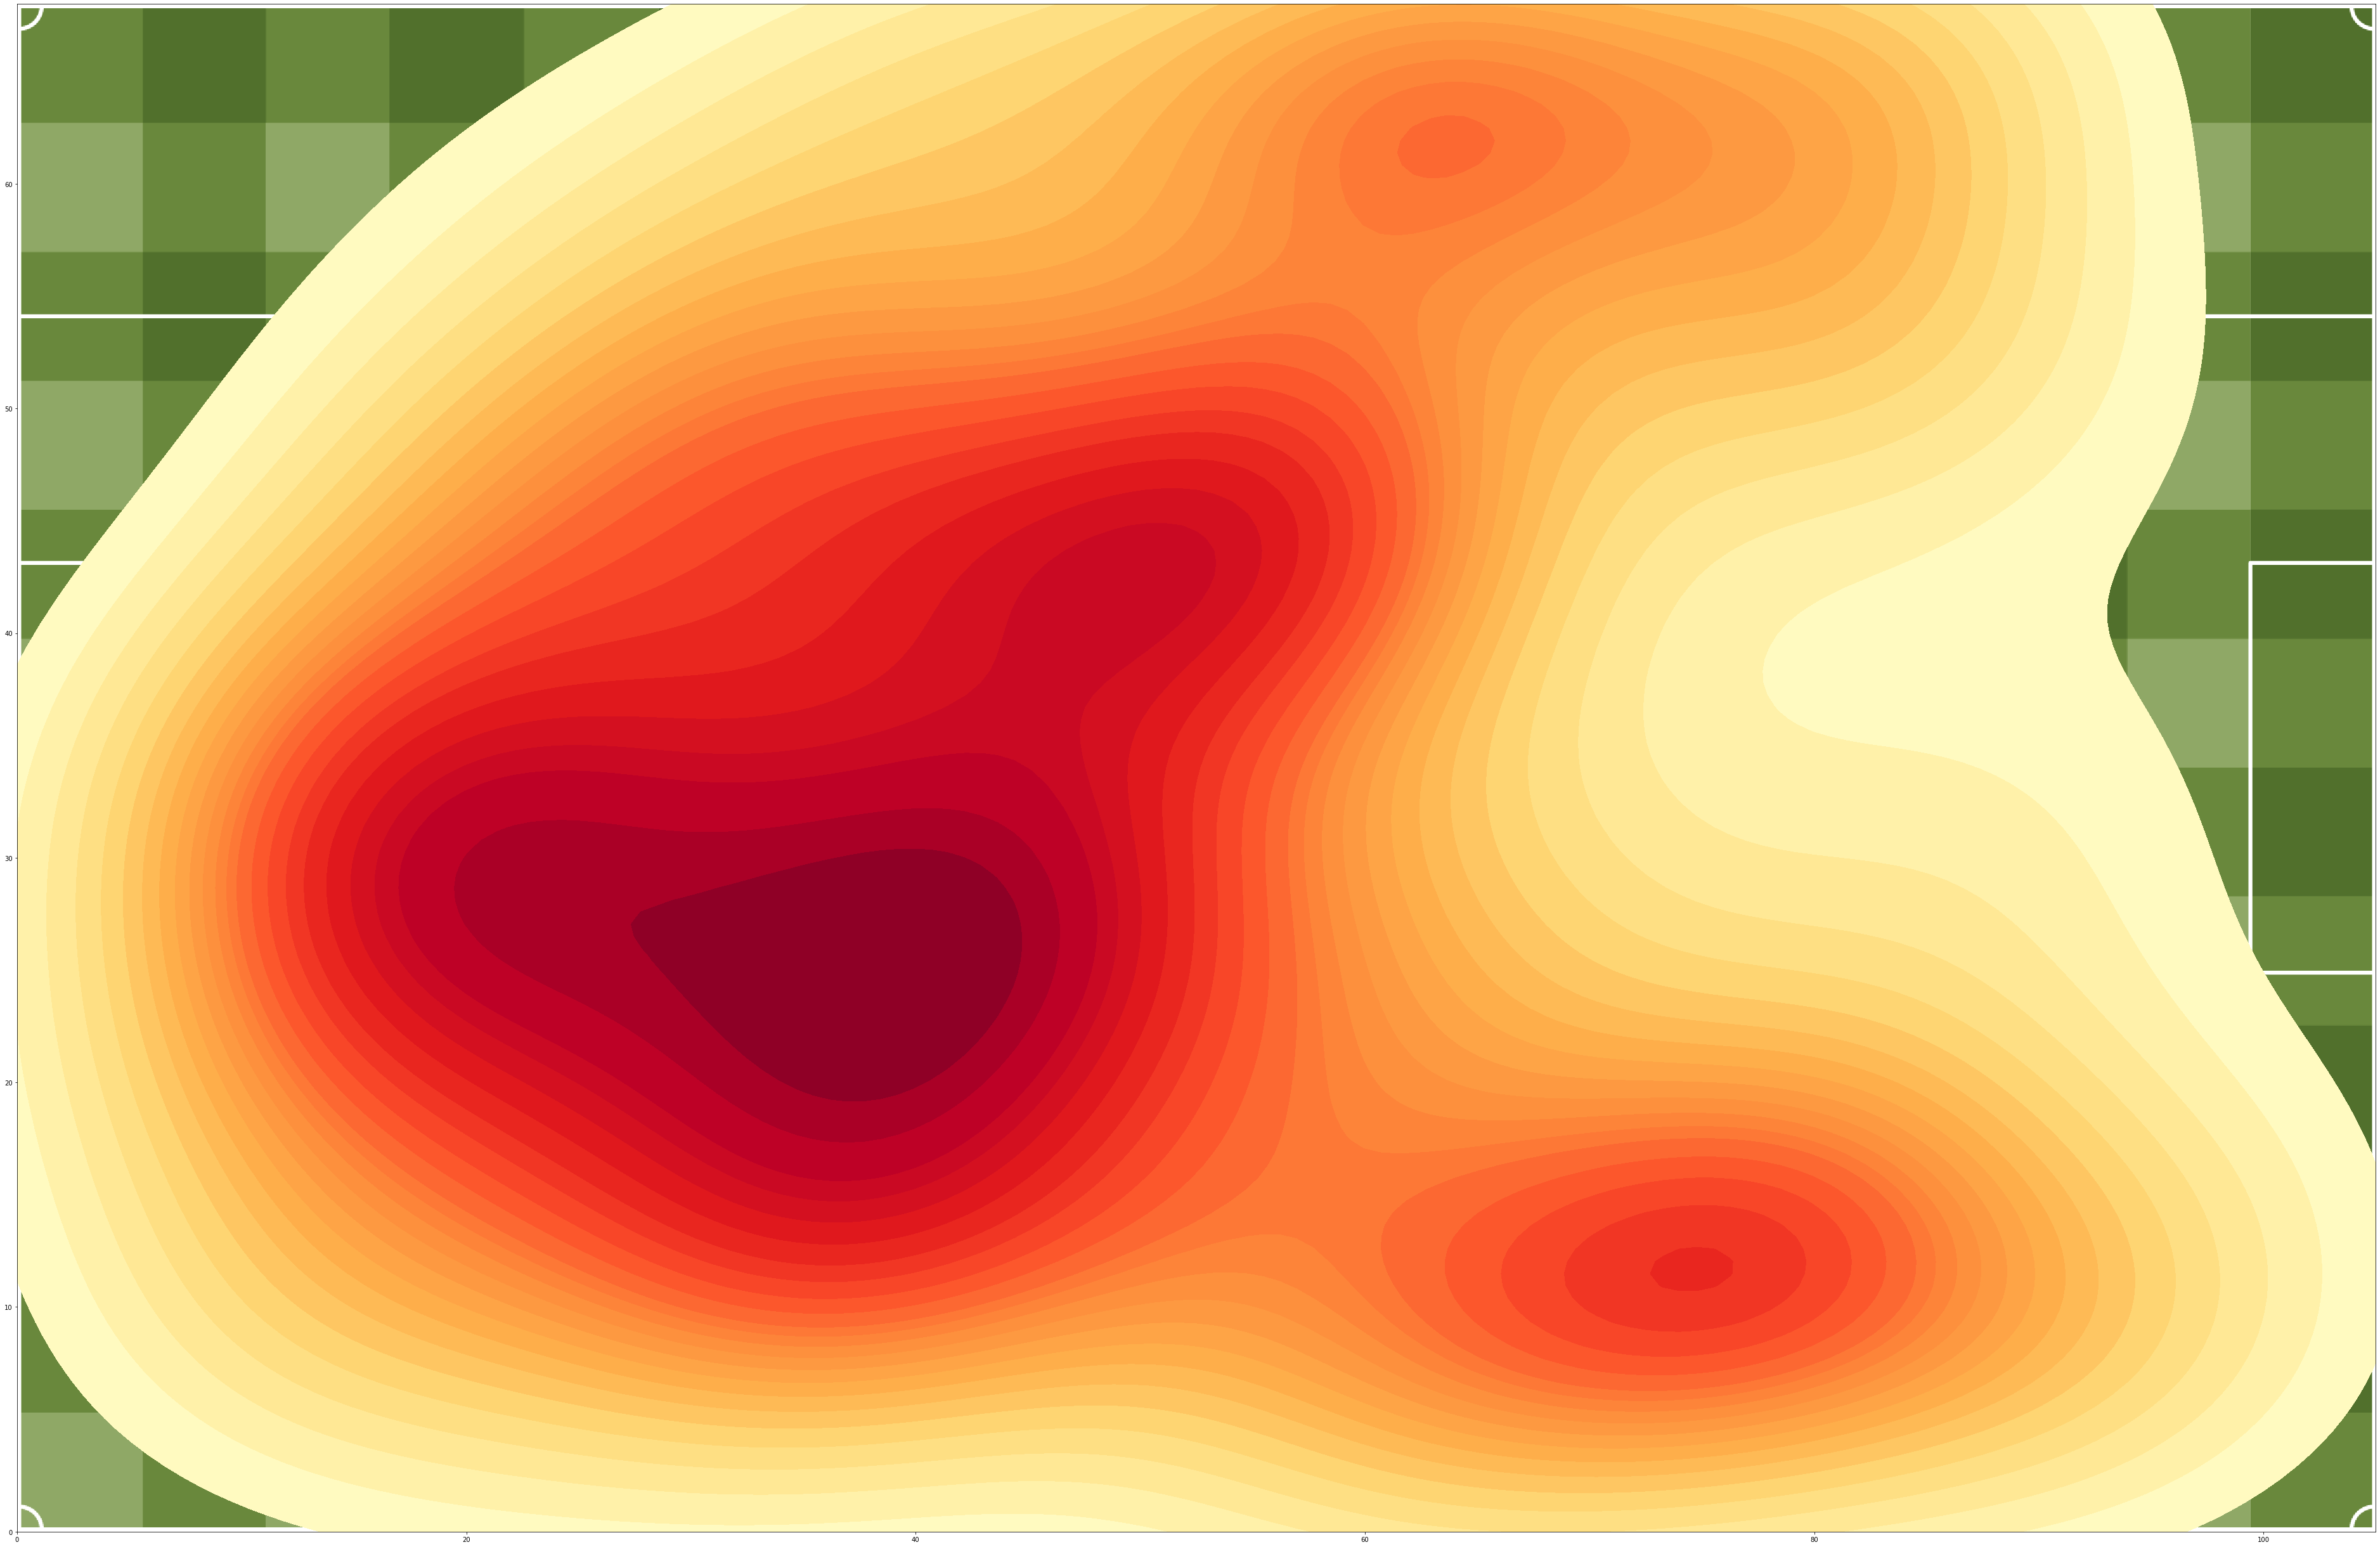

In [56]:
fig, ax = plt.subplots(figsize=(52.5, 34))
plt.axis([0,105,0,68])
ax.imshow(pitch, extent=[0,105,0,68]) # [0,105,0,68]
sns.kdeplot( x=touch_coords_team(passes, "arsenal", 1)["all_x"], y=touch_coords_team(passes, "arsenal", 1)["all_y"],
            n_levels=25, cmap="YlOrRd", shade=True)
# sns.kdeplot( x=press_coords_team(passes, "man_u", 1)["all_x"], y=press_coords_team(passes, "man_u", 1)["all_y"],
#             n_levels=30, color="navy")
plt.tight_layout()
plt.savefig("ars_passes1reverse.png")
plt.show()